### EXPLOTARY DATA ANALYSIS SUMMARY:
* Basic checks of data
* Examine the data
* Statistical measures of data
* Checking the distribution of continuous features
* Check skewnwness and kurtosis
* Distribution of mean of data
* Distribution of standard deviation of data

#### IMPORTING NECCESSARY LIBRARY:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings # Used to supressed the warnings
warnings.filterwarnings('ignore')

#### LOAD DATA FOR EXPLOTARY DATA ANALYSIS

In [2]:
path = "signal_path_loss_data.csv"
data = pd.read_csv(path)
pd.set_option('display.max_columns',None) # Used to display the all features

#### BASIC CHECKS OF DATA

In [3]:
data.head()

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss
0,2171407026,368.853581,42.029355,2.287991,14.207688,rural,46.066300,NLOS,rainy,-3.337696,74850605.86,323.535247
1,2557607817,145.408870,27.104702,2.348117,19.149884,urban,4.217460,LOS,rainy,3.208956,32638686.66,302.101929
2,3581872487,60.766213,35.515670,3.815246,17.524410,urban,51.372558,LOS,rainy,-2.924875,58257317.08,306.735772
3,1868877541,206.794088,42.936580,5.319497,16.790897,urban,59.819078,LOS,rainy,-1.941350,67333241.06,319.448295
4,1119490401,186.455720,40.528642,9.723401,9.560728,suburban,54.458540,NLOS,clear,-2.907063,71146062.37,344.803098


In [4]:
data.tail()

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss
6754,1650232202,282.925846,2.033956,5.910539,14.073015,suburban,25.459578,LOS,rainy,-8.715335,65722337.70,277.918465
6755,5816265095,276.111922,17.641787,6.849947,16.075043,rural,21.660008,LOS,clear,4.430261,89629750.56,295.804923
6756,5872071319,488.043983,38.003737,6.347916,13.637978,suburban,89.033806,LOS,clear,-0.326245,83385812.75,330.944234
6757,1147596786,104.656770,46.507039,8.184545,14.869183,suburban,57.766908,LOS,foggy,1.778606,74720130.13,314.621889
6758,4916158459,53.857339,24.012735,8.559757,18.560756,urban,60.636588,LOS,rainy,3.791809,52779764.68,318.234863


In [5]:
data.columns

Index(['Frequency', 'Distance', 'Transmitter Height', 'Receiver Height',
       'Antenna Gain', 'Environment', 'Obstacle Distance',
       'Path Characteristics', 'Weather Conditions', 'Shadowing Effects',
       'Frequency Bandwidth', 'Path Loss'],
      dtype='object')

In [6]:
data.shape

(6759, 12)

### EXAMINE THE DATA

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6759 entries, 0 to 6758
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frequency             6759 non-null   int64  
 1   Distance              6759 non-null   float64
 2   Transmitter Height    6759 non-null   float64
 3   Receiver Height       6759 non-null   float64
 4   Antenna Gain          6759 non-null   float64
 5   Environment           6759 non-null   object 
 6   Obstacle Distance     6759 non-null   float64
 7   Path Characteristics  6759 non-null   object 
 8   Weather Conditions    6759 non-null   object 
 9   Shadowing Effects     6759 non-null   float64
 10  Frequency Bandwidth   6759 non-null   float64
 11  Path Loss             6759 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usage: 633.8+ KB


This dataset consists of 6759 entries and 12 columns. Here's a breakdown of each column:

1. **Frequency**: This column contains integer values representing the frequency used in the signal transmission.
2. **Distance**: Float values indicating the distance between the transmitter and the receiver.
3. **Transmitter Height**: Float values representing the height of the transmitter.
4. **Receiver Height**: Float values representing the height of the receiver.
5. **Antenna Gain**: Float values indicating the gain of the antenna used.
6. **Environment**: Categorical variable (object type) representing the environment in which the signal transmission occurred.
7. **Obstacle Distance**: Float values indicating the distance to the nearest obstacle.
8. **Path Characteristics**: Categorical variable (object type) describing the characteristics of the signal path.
9. **Weather Conditions**: Categorical variable (object type) describing the weather conditions during the signal transmission.
10. **Shadowing Effects**: Float values representing the shadowing effects observed during signal transmission.
11. **Frequency Bandwidth**: Float values indicating the bandwidth of the signal.
12. **Path Loss**: Float values representing the path loss observed during the signal transmission.

The dataset contains a mixture of numerical (float64 and int64) and categorical (object) data types. There are no missing values in any of the columns, as indicated by the non-null counts for all columns being equal to the total number of entries (6759). The memory usage of the DataFrame is approximately 633.8 KB.

### STATISTICAL MEASURE OF DATA

In [8]:
data.describe()

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Obstacle Distance,Shadowing Effects,Frequency Bandwidth,Path Loss
count,6.759000e+03,6759.000000,6759.000000,6759.000000,6759.000000,6759.000000,6759.000000,6.759000e+03,6759.000000
mean,3.509104e+09,255.356792,25.595137,5.517892,12.454730,49.997171,-0.043002,5.544371e+07,324.585536
std,1.449465e+09,140.658841,14.152228,2.584078,4.327145,28.962016,3.018512,2.602457e+07,25.750362
min,1.001314e+09,10.204475,1.000500,1.007534,5.005598,0.022320,-12.140211,1.001350e+07,237.256938
25%,2.253650e+09,134.250543,13.349302,3.259044,8.655003,24.844989,-2.069453,3.319889e+07,306.633656
50%,3.515398e+09,256.059759,25.722240,5.535823,12.401998,50.403415,-0.024405,5.547954e+07,324.395694
75%,4.776396e+09,376.540969,37.782872,7.761249,16.148464,74.775579,2.041917,7.811854e+07,343.694963
max,5.999575e+09,499.962911,49.989720,9.999409,19.997733,99.962738,11.145581,9.998989e+07,392.904844


This statistical summary provides information about the central tendency and dispersion of each numerical variable in the dataset:

1. **Count**: Indicates the number of non-null values present in each column. For example, there are 6759 non-null values in each column, meaning there are no missing values.

2. **Mean**: Represents the average value of each variable. For instance, the mean Frequency is approximately 3.509104e+09, and the mean Path Loss is approximately 324.585536.

3. **Standard Deviation (Std)**: Measures the dispersion or spread of the values around the mean. A higher standard deviation indicates greater variability from the mean. For example, the standard deviation of the Frequency is approximately 1.449465e+09, while the standard deviation of the Path Loss is approximately 25.750362.

4. **Min**: Denotes the minimum value observed in each column. For example, the minimum Frequency value is approximately 1.001314e+09, and the minimum Path Loss is approximately 237.256938.

5. **25th Percentile (25%)**: Represents the value below which 25% of the data falls. For instance, 25% of the Frequency values are below approximately 2.253650e+09, and 25% of the Path Loss values are below approximately 306.633656.

6. **50th Percentile (Median or 50%)**: Represents the value below which 50% of the data falls. It is also the median value. For example, 50% of the Frequency values are below approximately 3.515398e+09, and 50% of the Path Loss values are below approximately 324.395694.

7. **75th Percentile (75%)**: Represents the value below which 75% of the data falls. For instance, 75% of the Frequency values are below approximately 4.776396e+09, and 75% of the Path Loss values are below approximately 343.694963.

8. **Max**: Denotes the maximum value observed in each column. For example, the maximum Frequency value is approximately 5.999575e+09, and the maximum Path Loss is approximately 392.904844.

In [9]:
data.describe(include="O")

,Environment,Path Characteristics,Weather Conditions
count,6759,6759,6759
unique,3,2,3
top,urban,NLOS,rainy
freq,2303,3453,2287


This statistical measure provides insights into the categorical variables in the dataset:

1. **Count**: The count indicates the total number of non-null values for each categorical variable. In this case, it tells us how many observations are present for each category.

2. **Unique**: The unique count represents the number of unique categories within each variable. For example, for the 'Environment' variable, there are 3 unique categories, indicating that the data is divided into 3 different types of environments.

3. **Top**: The 'top' value denotes the category that appears most frequently in the dataset. It represents the mode of the categorical variable. For instance, in the 'Weather Conditions' variable, the most frequent weather condition observed in the dataset is 'rainy'.

4. **Frequency**: The 'freq' value shows the frequency of the top category. It indicates how many times the top category appears in the dataset. For example, 'urban' appears 2303 times in the 'Environment' variable, meaning that 'urban' is the most common environment type in the dataset.

Overall, this statistical measure provides a summary of the distribution of categorical variables in the dataset, highlighting the most common categories and their frequencies.

### CHECKING THE DISTRIBUTION OF CONTINUOUS FEATURE 
* Those feature continuous in nature only use this feature to plot a distribution

**Distplot:** Distplot is used to observe how the data is distributed in a particular dataset.


In [10]:
data

,Frequency,Distance,Transmitter Height,Receiver Height,Antenna Gain,Environment,Obstacle Distance,Path Characteristics,Weather Conditions,Shadowing Effects,Frequency Bandwidth,Path Loss
0,2171407026,368.853581,42.029355,2.287991,14.207688,rural,46.066300,NLOS,rainy,-3.337696,74850605.86,323.535247
1,2557607817,145.408870,27.104702,2.348117,19.149884,urban,4.217460,LOS,rainy,3.208956,32638686.66,302.101929
2,3581872487,60.766213,35.515670,3.815246,17.524410,urban,51.372558,LOS,rainy,-2.924875,58257317.08,306.735772
3,1868877541,206.794088,42.936580,5.319497,16.790897,urban,59.819078,LOS,rainy,-1.941350,67333241.06,319.448295
4,1119490401,186.455720,40.528642,9.723401,9.560728,suburban,54.458540,NLOS,clear,-2.907063,71146062.37,344.803098
...,...,...,...,...,...,...,...,...,...,...,...,...
6754,1650232202,282.925846,2.033956,5.910539,14.073015,suburban,25.459578,LOS,rainy,-8.715335,65722337.70,277.918465
6755,5816265095,276.111922,17.641787,6.849947,16.075043,rural,21.660008,LOS,clear,4.430261,89629750.56,295.804923
6756,5872071319,488.043983,38.003737,6.347916,13.637978,suburban,89.033806,LOS,clear,-0.326245,83385812.75,330.944234
6757,1147596786,104.656770,46.507039,8.184545,14.869183,suburban,57.766908,LOS,foggy,1.778606,74720130.13,314.621889


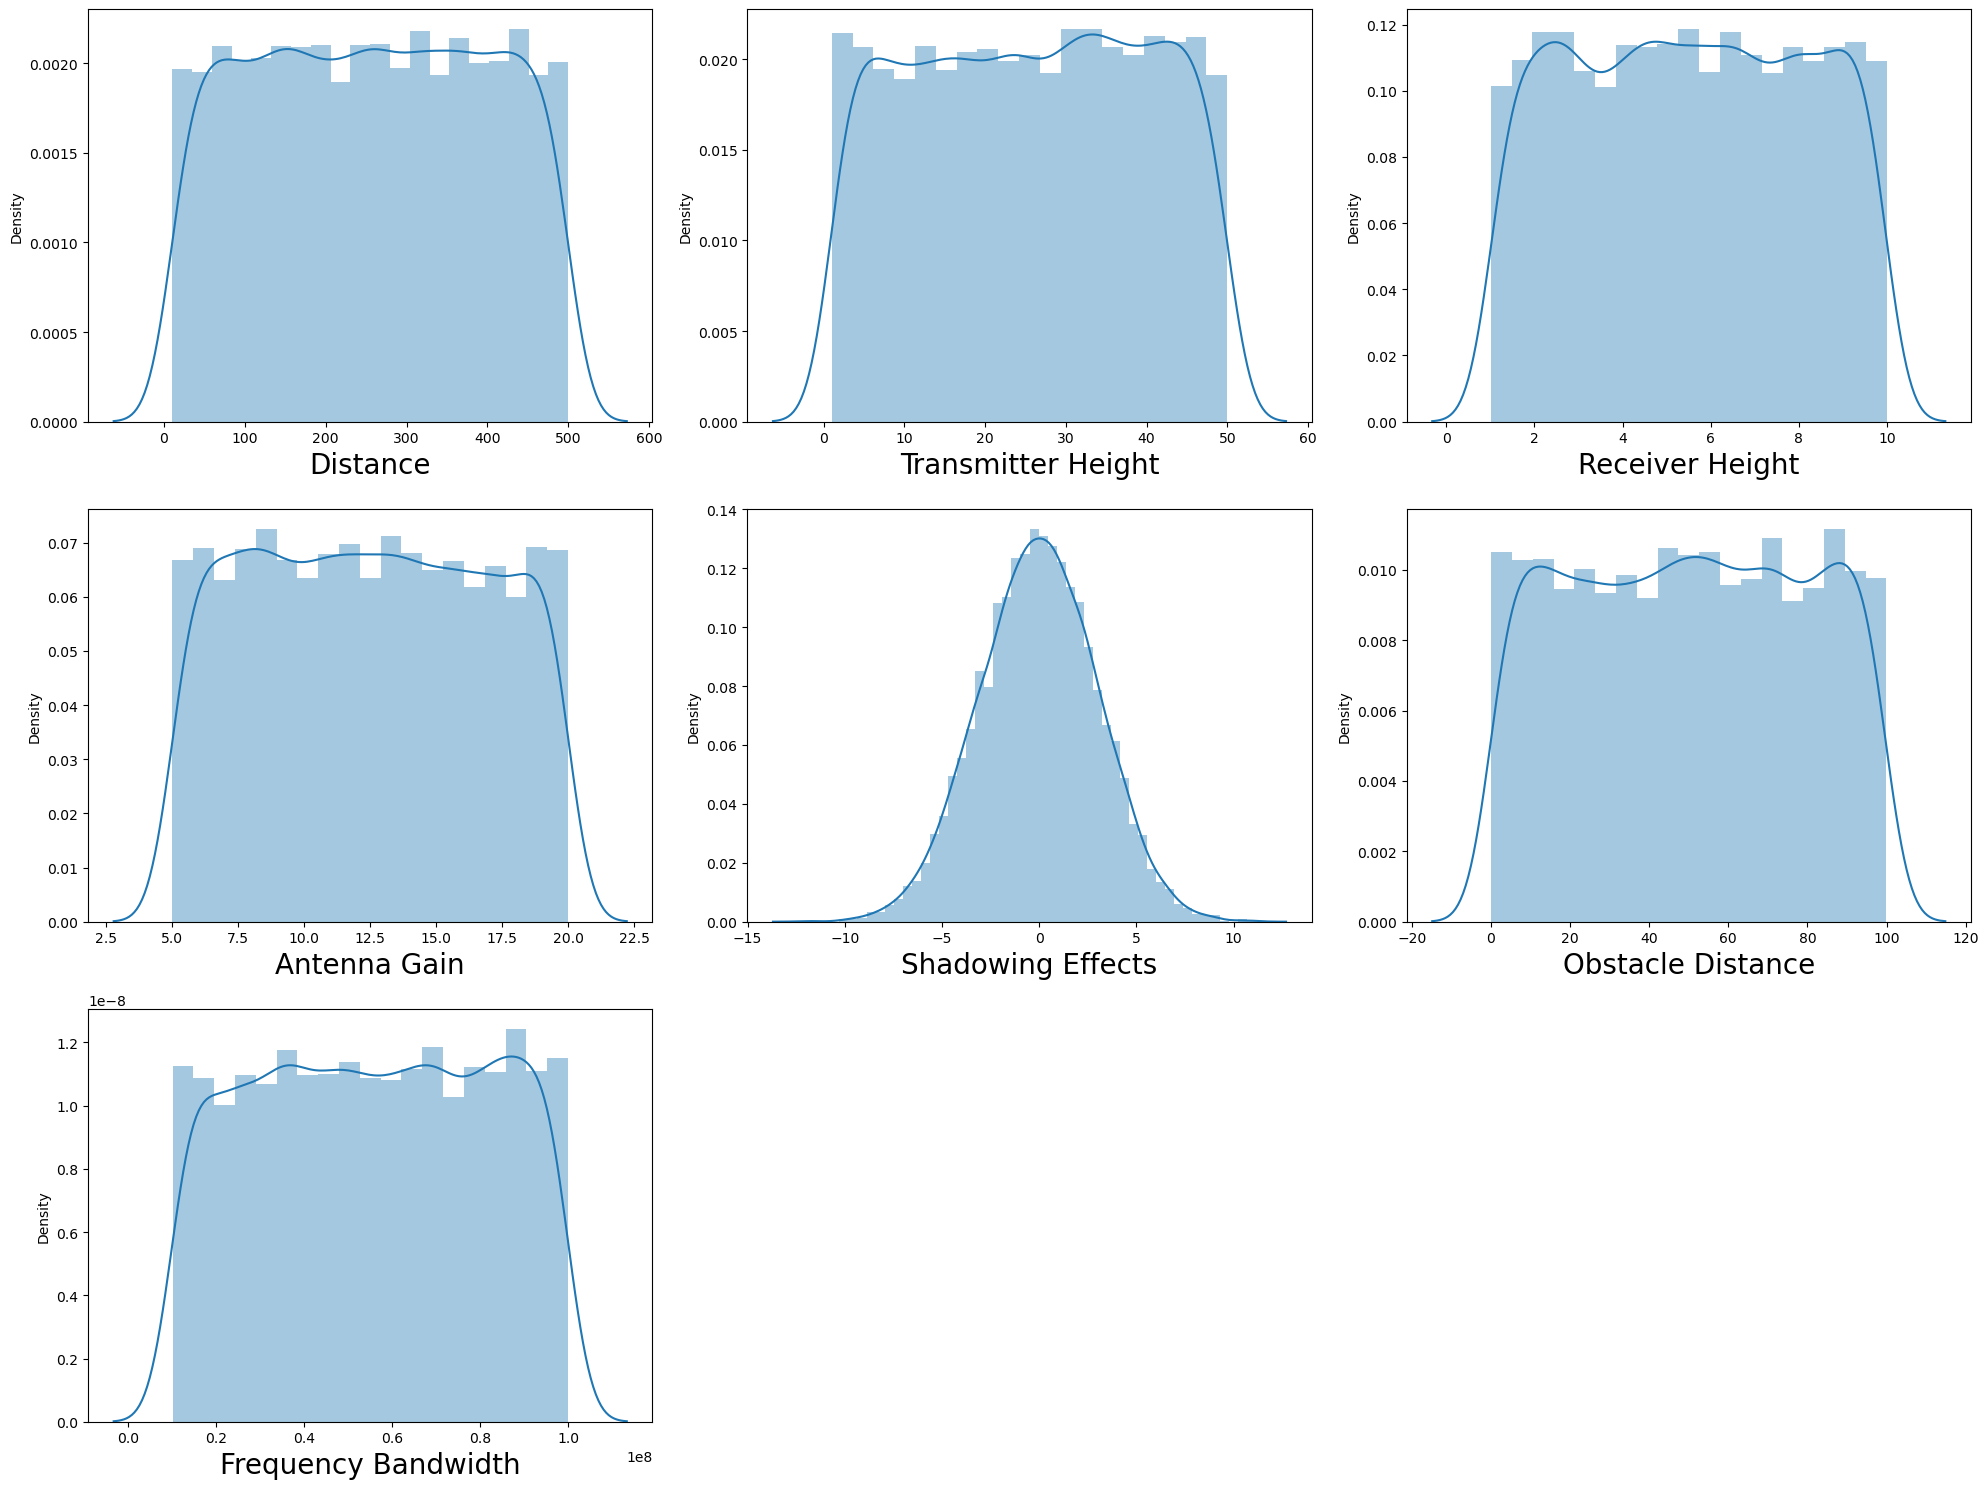

In [11]:
# Make a list of continuous feature in nature
continuous = data[['Distance','Transmitter Height','Receiver Height','Antenna Gain',
                   'Shadowing Effects','Obstacle Distance','Frequency Bandwidth']]

plt.figure(figsize=(20,15)) # defining canvas size
plotno = 1 # counter

for column in continuous: # iteration of columns / acessing the columns from count 
    if plotno<=8:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 7 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.distplot(x=continuous[column]) # Plotting dist plots 
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

### DISTRIBUTION OF MEAN OF DATA

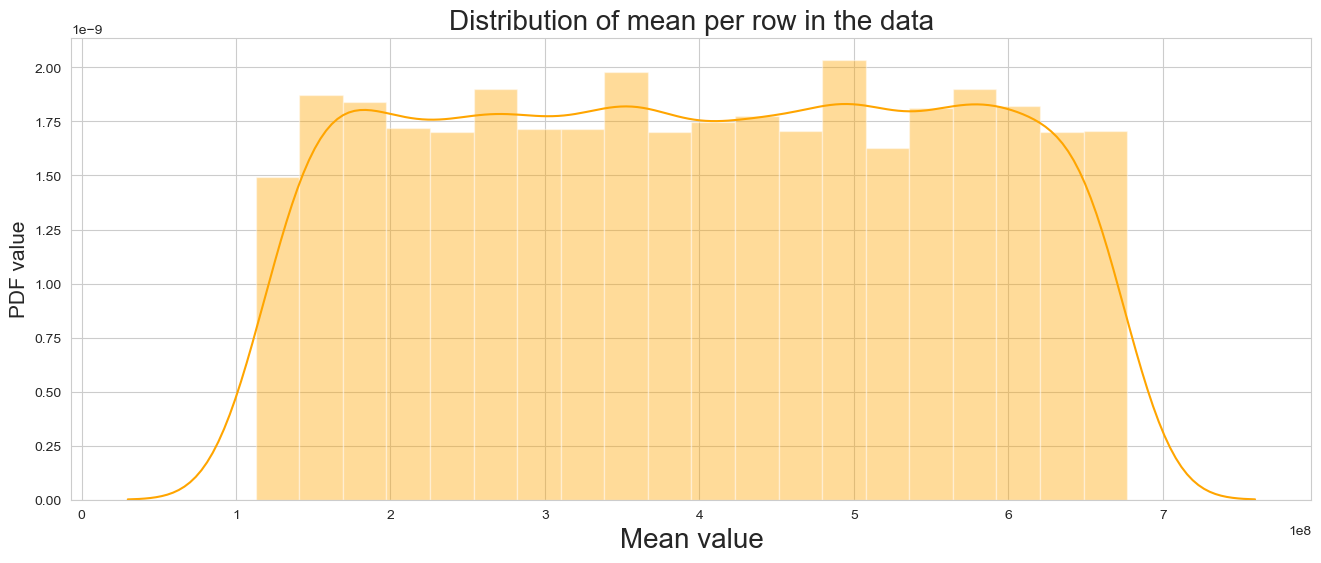

In [12]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = data.columns.values[0:27]
plt.title('Distribution of mean per row in the data',fontsize=20)
plt.xlabel('Mean value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(data[features].mean(axis=1),color='ORANGE', kde=True)
plt.show()

the plot visually represents how the mean values of the specified features are distributed across the rows of the dataset, providing insights into the central tendency of the data.

### DISTRIBUTION OF STANDARD DEVIATION OF DATA

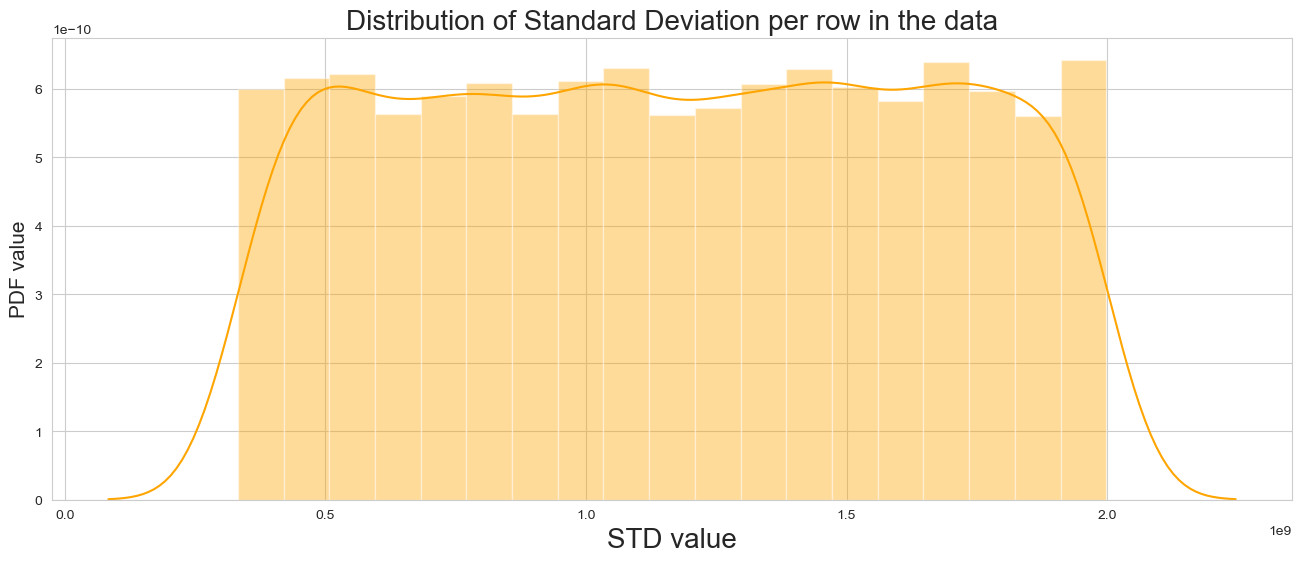

In [13]:
plt.figure(figsize=(16,6))
sns.set_style('whitegrid')
features = data.columns.values[0:27]
plt.title('Distribution of Standard Deviation per row in the data',fontsize=20)
plt.xlabel('STD value',fontsize=20)
plt.ylabel('PDF value',fontsize=15)
sns.distplot(data[features].std(axis=1),color='ORANGE', kde=True)
plt.show()